## Phase 1 Project


* Student name: Qilun Chen, Evan Serrano
* Student pace: full time
* Scheduled project review date/time: 03/10/2022
* Instructor name: Praveen Gowtham
* Blog post URL:https://github.com/SerranoEvan/dsc-phase-1-project-v2-4


# Introduction

Microsoft sees all the big companies creating original video content 
and they want to get in on the fun. They have decided to create a new movie studio, 
but they don’t know anything about creating movies.

# Objectives

-Find ROI:domestic ROI and world wide ROI <br>
-Which genre do people like?<br>
-Find the most valuable directors<br>

### Data Import

In [85]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [86]:
budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv')
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv')
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv', sep = '\t')
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv', sep = '\t', encoding = 'latin-1')
conn = sqlite3.Connection("zippedData/im.db")

## Return on Investment Analysis

### We want to find the ideal budget for the best chance at maximizing revenue

#### Convert budget and revenue datasets into integers

In [87]:
budgets_df.loc[:, 'worldwide_gross'] = budgets_df["worldwide_gross"].str.replace(",", "")
budgets_df.loc[:, 'worldwide_gross'] = budgets_df["worldwide_gross"].str.replace("$", "").astype('int64')
budgets_df.loc[:, 'production_budget'] = budgets_df["production_budget"].str.replace(",", "")
budgets_df.loc[:, 'production_budget'] = budgets_df["production_budget"].str.replace("$", "").astype('int64')
budgets_df.loc[:, 'domestic_gross'] = budgets_df["domestic_gross"].str.replace(",", "")
budgets_df.loc[:, 'domestic_gross'] = budgets_df["domestic_gross"].str.replace("$", "").astype('int64')

#### Convert release date to datetime

In [150]:
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])

In [151]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 5677 to 341
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5234 non-null   int64         
 1   release_date       5234 non-null   datetime64[ns]
 2   movie              5234 non-null   object        
 3   production_budget  5234 non-null   int64         
 4   domestic_gross     5234 non-null   int64         
 5   worldwide_gross    5234 non-null   int64         
 6   releaseYear        5234 non-null   int64         
 7   worldwide_ROI      5234 non-null   float64       
 8   domestic_ROI       5234 non-null   float64       
 9   P/L                5234 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 609.8+ KB


#### The movie industry has changed so rapidly. Covid and the prominence of streaming services has dramatically influenced the way people consume movies. In 2020, box office revenue was only 2.09B for the North American film industry. Down from 11.32B in 2019 per Zippia Research. When we're looking at profitability, we want to use the last five years of data to try to account for trends that may no longer be applicable. 

#### Remove outlier movies with no budgets or no revenue that were either never released or the data may be unavailable 

In [152]:
budgets_df.drop(budgets_df[budgets_df['production_budget'] == 0].index, inplace = True)
budgets_df.drop(budgets_df[budgets_df['domestic_gross'] == 0].index, inplace = True)
budgets_df.drop(budgets_df[budgets_df['worldwide_gross'] == 0].index, inplace = True)

#### Calculate Return on Investment (ROI) for both domestic and gross revenue columns

In [8]:
#budgets_df.drop(budgets_df[budgets_df['production_budget'] < 10000000].index, inplace = True)

In [153]:
budgets_df['worldwide_ROI'] = ((budgets_df['worldwide_gross'] - budgets_df['production_budget']) / budgets_df['production_budget']) * 100
budgets_df['domestic_ROI'] = ((budgets_df['domestic_gross'] - budgets_df['production_budget']) / budgets_df['production_budget']) * 100

In [112]:
#budgets_df

In [154]:
budgets_df['release_date']

5677   1915-02-08
5614   1916-12-24
5683   1920-09-17
5606   1925-11-19
4569   1925-12-30
          ...    
4534   2019-06-07
2      2019-06-07
580    2019-06-07
1997   2019-06-14
341    2019-06-14
Name: release_date, Length: 5234, dtype: datetime64[ns]

In [155]:
budgets_df['releaseYear'] = budgets_df['release_date'].dt.year
budgets_df['releaseYear']

5677    1915
5614    1916
5683    1920
5606    1925
4569    1925
        ... 
4534    2019
2       2019
580     2019
1997    2019
341     2019
Name: releaseYear, Length: 5234, dtype: int64

In [158]:
recentBudgets_df = budgets_df.loc[(budgets_df['releaseYear'] > 2014) & (budgets_df['releaseYear'] < 2022)]
recentBudgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,releaseYear,worldwide_ROI,domestic_ROI,P/L
1217,18,2015-01-09,Taken 3,48000000,89256424,327656424,2015,582.617550,85.950883,279656424
2524,25,2015-01-09,Selma,20000000,52076908,66776576,2015,233.882880,160.384540,46776576
2372,73,2015-01-16,The Wedding Ringer,23000000,64460211,80171596,2015,248.572157,180.261787,57171596
1004,5,2015-01-16,Paddington,55000000,76223578,258789097,2015,370.525631,38.588324,203789097
746,47,2015-01-16,Blackhat,70000000,8005980,19665004,2015,-71.907137,-88.562886,-50334996
...,...,...,...,...,...,...,...,...,...,...
4534,35,2019-06-07,Late Night,4000000,246305,246305,2019,-93.842375,-93.842375,-3753695
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-57.210757,-87.782186,-200237650
580,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,2019,41.689370,-20.255431,33351496
1997,98,2019-06-14,Shaft,30000000,600000,600000,2019,-98.000000,-98.000000,-29400000


In [162]:
recentBudgets_df = recentBudgets_df.loc[(budgets_df['worldwide_ROI'] < 30000)]
recentBudgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,releaseYear,worldwide_ROI,domestic_ROI,P/L
1217,18,2015-01-09,Taken 3,48000000,89256424,327656424,2015,582.617550,85.950883,279656424
2524,25,2015-01-09,Selma,20000000,52076908,66776576,2015,233.882880,160.384540,46776576
2372,73,2015-01-16,The Wedding Ringer,23000000,64460211,80171596,2015,248.572157,180.261787,57171596
1004,5,2015-01-16,Paddington,55000000,76223578,258789097,2015,370.525631,38.588324,203789097
746,47,2015-01-16,Blackhat,70000000,8005980,19665004,2015,-71.907137,-88.562886,-50334996
...,...,...,...,...,...,...,...,...,...,...
4534,35,2019-06-07,Late Night,4000000,246305,246305,2019,-93.842375,-93.842375,-3753695
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-57.210757,-87.782186,-200237650
580,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,2019,41.689370,-20.255431,33351496
1997,98,2019-06-14,Shaft,30000000,600000,600000,2019,-98.000000,-98.000000,-29400000


### Let's compare the budget with gross revenues and ROI

In [180]:
recentBudgets_df['worldwide_ROI'].mean()

284.7528396165991

In [163]:
recentBudgets_df.corr()

,id,production_budget,domestic_gross,worldwide_gross,releaseYear,worldwide_ROI,domestic_ROI,P/L
id,1.000000,-0.077675,-0.040658,-0.047642,0.086065,0.055791,0.061338,-0.036506
production_budget,-0.077675,1.000000,0.709825,0.779370,0.095527,-0.063019,-0.150902,0.667320
domestic_gross,-0.040658,0.709825,1.000000,0.943035,0.082532,0.239641,0.166300,0.937042
worldwide_gross,-0.047642,0.779370,0.943035,1.000000,0.069030,0.222236,0.082607,0.986736
releaseYear,0.086065,0.095527,0.082532,0.069030,1.000000,0.048672,0.061747,0.057304
worldwide_ROI,0.055791,-0.063019,0.239641,0.222236,0.048672,1.000000,0.910793,0.280490
domestic_ROI,0.061338,-0.150902,0.166300,0.082607,0.061747,0.910793,1.000000,0.137288
P/L,-0.036506,0.667320,0.937042,0.986736,0.057304,0.280490,0.137288,1.000000


#### Looking above at the table of correlations, some interesting statistics are shown. As you might expect, there is a moderate positive correlation between production budget and both worldwide and domestic gross revenues. The larger the movie, the more revenue you could probably expect. However, budgets have the smallest of effects on a movie's overall profitability. In fact, the correlation between budget and both global and worldwide ROIs is actually negative. This underscores just how difficult it is to produce a successful hit movie and the formula is not as simple as pouring dollars in.

# Data Visualizations

### Let's look at some graphs showing budget vs global and domestic ROI

Text(0, 0.5, 'ROI(%)')

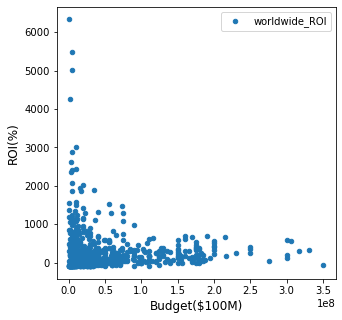

In [184]:
ax = recentBudgets_df.plot(x = 'production_budget', y = 'worldwide_ROI', kind = "scatter", figsize = (5,5), 
                           label = 'worldwide_ROI')

plt.xlabel('Budget($100M)',fontsize = 12)
plt.ylabel('ROI(%)', fontsize = 12)


Text(0, 0.5, 'ROI(%)')

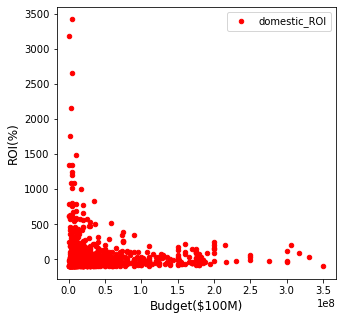

In [185]:
ax = recentBudgets_df.plot(x = 'production_budget', y = 'domestic_ROI', kind = "scatter", figsize = (5,5), 
                           label = 'domestic_ROI', color = 'r')
plt.xlabel('Budget($100M)',fontsize = 12)
plt.ylabel('ROI(%)', fontsize = 12)

### ROI has nearly no correlation to Budget

## What genre(s) of movies should Microsoft pursue?

### Let's start by looking at the types of info in our dataframes

In [26]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [27]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### After looking at the rt_reviews_df table, movie titles were not listed so we only focused on tmdb_movies_df. We want some rows with certain amount of vote count, so we check the describe and drop all row with low vote count.

In [29]:
tmdb_movies_df['vote_count'].describe()

count    26517.000000
mean       194.224837
std        960.961095
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      22186.000000
Name: vote_count, dtype: float64

### Drop all rows below vote_count.mean() and rows with no genre id


In [31]:
tmdb_movies_df.drop(tmdb_movies_df[tmdb_movies_df['vote_count'] < 195].index, inplace = True)
tmdb_movies_df.drop(tmdb_movies_df[tmdb_movies_df['genre_ids'] == '[]'].index, inplace = True)

### Let's look at the new vote count

In [67]:
tmdb_movies_df['vote_count'].describe()

count     2707.000000
mean      1754.238271
std       2515.682917
min        195.000000
25%        353.000000
50%        726.000000
75%       1930.500000
max      22186.000000
Name: vote_count, dtype: float64

## The Correlation between Good rating and popularity

In [33]:
tmdb_movies_df.corr(method = 'pearson')

,Unnamed: 0,id,popularity,vote_average,vote_count
Unnamed: 0,1.000000,0.877460,0.205507,0.066075,-0.001465
id,0.877460,1.000000,0.084313,0.043523,-0.116771
popularity,0.205507,0.084313,1.000000,0.235176,0.690093
vote_average,0.066075,0.043523,0.235176,1.000000,0.323624
vote_count,-0.001465,-0.116771,0.690093,0.323624,1.000000


### Let's create a visualization for the average vote score vs popularity 

### Even if your movie is highly rated, popularity is not assured

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

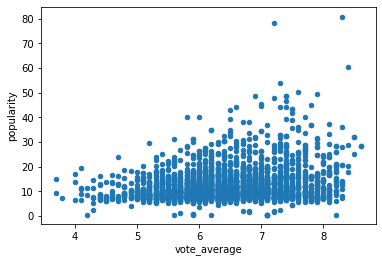

In [34]:
tmdb_movies_df.plot(x = 'vote_average', y = 'popularity', kind = "scatter")

## Popularity is more valuable than rating. Which genre(s) are most popular?

### We must convert genre from integer to string

In [35]:
swap_dict = {
    28 : "Action",
    12 : "Adventure",
    16 : "Animation",
    35 : "Comedy",
    80 : "Crime",
    99 : "Documentary",
    18 : "Drama",
    10751 : "Family",
    14 : "Fantasy",
    36 : "History",
    27 : "Horror",
    10402 : "Music",
    9648 : "Mystery",
    10749 : "Romance",
    878 : "Science Fiction",
    10770 : "TV Movie",
    53 : "Triller",
    10752 : "War",
    37 : "Western"
}

In [36]:
def swap_genre(data):
    new_list = []
    finallist = []
    for str_num in data.split(','):
        new_list.append(int(str_num.strip('[], ')))
    for x in new_list:
        finallist.append(swap_dict[x])
    return finallist

tet = '[12, 14, 10751]' 
swap_genre(tmdb_movies_df['genre_ids'][218])

['Comedy', 'Drama', 'Fantasy', 'Horror', 'Mystery']

In [37]:
#drop row with no number contain in genre_ids column.
tmdb_movies_df.drop(tmdb_movies_df[tmdb_movies_df['genre_ids'] == "[]"].index, inplace = True)

In [38]:
#create a new column call genre_string_names, that contain genre into string.
tmdb_movies_df['genre_string_names'] = tmdb_movies_df['genre_ids'].map(lambda x: swap_genre(x))

In [39]:
tmdb_movies_df['genre_string_names']

0                             [Adventure, Fantasy, Family]
1                  [Fantasy, Adventure, Animation, Family]
2                     [Adventure, Action, Science Fiction]
3                              [Animation, Comedy, Family]
4                     [Action, Science Fiction, Adventure]
                               ...                        
24409                                   [Mystery, Triller]
24422                                      [Comedy, Drama]
24462    [Action, Animation, Fantasy, Adventure, Comedy...
24472                                             [Comedy]
24546                            [Fantasy, Drama, Mystery]
Name: genre_string_names, Length: 2707, dtype: object

### Store all rating and popularity as list in a dict call dict_of_genre.

In [40]:

dict_of_genre = {
    "Action" : {"rating" : [], "popularity" : []},
    "Adventure" : {"rating" : [], "popularity" : []},
    "Animation" : {"rating" : [], "popularity" : []},
    "Comedy" : {"rating" : [], "popularity" : []},
    "Crime" : {"rating" : [], "popularity" : []},
    "Documentary" : {"rating" : [], "popularity" : []},
    "Drama" : {"rating" : [], "popularity" : []},
    "Family" : {"rating" : [], "popularity" : []},
    "Fantasy" : {"rating" : [], "popularity" : []},
    "History" : {"rating" : [], "popularity" : []},
    "Horror" : {"rating" : [], "popularity" : []},
    "Music" : {"rating" : [], "popularity" : []},
    "Mystery" : {"rating" : [], "popularity" : []},
    "Romance" : {"rating" : [], "popularity" : []},
    "Science Fiction" : {"rating" : [], "popularity" : []},
    "TV Movie" : {"rating" : [], "popularity" : []},
    "Triller" : {"rating" : [], "popularity" : []},
    "War" : {"rating" : [], "popularity" : []},
    "Western" : {"rating" : [], "popularity" : []}
}
for index, row in tmdb_movies_df.iterrows():
    for genre in row["genre_string_names"]:
        if genre in dict_of_genre:
            dict_of_genre[genre]["rating"].append(row["vote_average"])
            dict_of_genre[genre]["popularity"].append(row["popularity"])

#### Let's write a function

In [41]:
 
def find_avg(data):
    total = 0
    lenght = len(data)
    for num in data:
        total += num
    return (total/lenght)

dict_of_genre_avg_value = dict_of_genre
for genre in dict_of_genre_avg_value:
    dict_of_genre_avg_value[genre]["avg_rating"] = find_avg(dict_of_genre[genre]['rating'])
    dict_of_genre_avg_value[genre]["avg_popularity"] = find_avg(dict_of_genre[genre]['popularity'])
    del dict_of_genre_avg_value[genre]['rating']
    del dict_of_genre_avg_value[genre]['popularity']
    dict_of_genre_avg_value[genre]["avg_rating"] = round(dict_of_genre_avg_value[genre]["avg_rating"],2)
    dict_of_genre_avg_value[genre]["avg_popularity"] = round(dict_of_genre_avg_value[genre]["avg_popularity"],2)
dict_of_genre_avg_value

{'Action': {'avg_rating': 6.33, 'avg_popularity': 16.16},
 'Adventure': {'avg_rating': 6.48, 'avg_popularity': 17.39},
 'Animation': {'avg_rating': 6.89, 'avg_popularity': 14.13},
 'Comedy': {'avg_rating': 6.34, 'avg_popularity': 11.75},
 'Crime': {'avg_rating': 6.43, 'avg_popularity': 12.68},
 'Documentary': {'avg_rating': 7.51, 'avg_popularity': 7.98},
 'Drama': {'avg_rating': 6.72, 'avg_popularity': 11.35},
 'Family': {'avg_rating': 6.61, 'avg_popularity': 14.61},
 'Fantasy': {'avg_rating': 6.48, 'avg_popularity': 16.41},
 'History': {'avg_rating': 7.01, 'avg_popularity': 12.05},
 'Horror': {'avg_rating': 5.8, 'avg_popularity': 11.16},
 'Music': {'avg_rating': 6.74, 'avg_popularity': 11.19},
 'Mystery': {'avg_rating': 6.32, 'avg_popularity': 12.13},
 'Romance': {'avg_rating': 6.62, 'avg_popularity': 10.98},
 'Science Fiction': {'avg_rating': 6.36, 'avg_popularity': 16.18},
 'TV Movie': {'avg_rating': 6.54, 'avg_popularity': 8.72},
 'Triller': {'avg_rating': 6.2, 'avg_popularity': 12

In [42]:
genre_series = pd.Series(dict_of_genre_avg_value)
genre_series

Action             {'avg_rating': 6.33, 'avg_popularity': 16.16}
Adventure          {'avg_rating': 6.48, 'avg_popularity': 17.39}
Animation          {'avg_rating': 6.89, 'avg_popularity': 14.13}
Comedy             {'avg_rating': 6.34, 'avg_popularity': 11.75}
Crime              {'avg_rating': 6.43, 'avg_popularity': 12.68}
Documentary         {'avg_rating': 7.51, 'avg_popularity': 7.98}
Drama              {'avg_rating': 6.72, 'avg_popularity': 11.35}
Family             {'avg_rating': 6.61, 'avg_popularity': 14.61}
Fantasy            {'avg_rating': 6.48, 'avg_popularity': 16.41}
History            {'avg_rating': 7.01, 'avg_popularity': 12.05}
Horror              {'avg_rating': 5.8, 'avg_popularity': 11.16}
Music              {'avg_rating': 6.74, 'avg_popularity': 11.19}
Mystery            {'avg_rating': 6.32, 'avg_popularity': 12.13}
Romance            {'avg_rating': 6.62, 'avg_popularity': 10.98}
Science Fiction    {'avg_rating': 6.36, 'avg_popularity': 16.18}
TV Movie            {'avg

### We now have a table of the genres listed in order of popularity

In [228]:
genre_df = pd.DataFrame.from_dict(dict_of_genre_avg_value, orient = "index")
genre_df = genre_df.sort_values(by = 'avg_popularity', ascending = True)[8:]
genre_df

,avg_rating,avg_popularity
Mystery,6.32,12.13
Triller,6.20,12.47
Crime,6.43,12.68
War,6.94,13.28
Western,6.50,13.98
Animation,6.89,14.13
Family,6.61,14.61
Action,6.33,16.16
Science Fiction,6.36,16.18
Fantasy,6.48,16.41


### Lets look at a visualization of genres by respective rating and popularity

Text(0, 0.5, 'Genre')

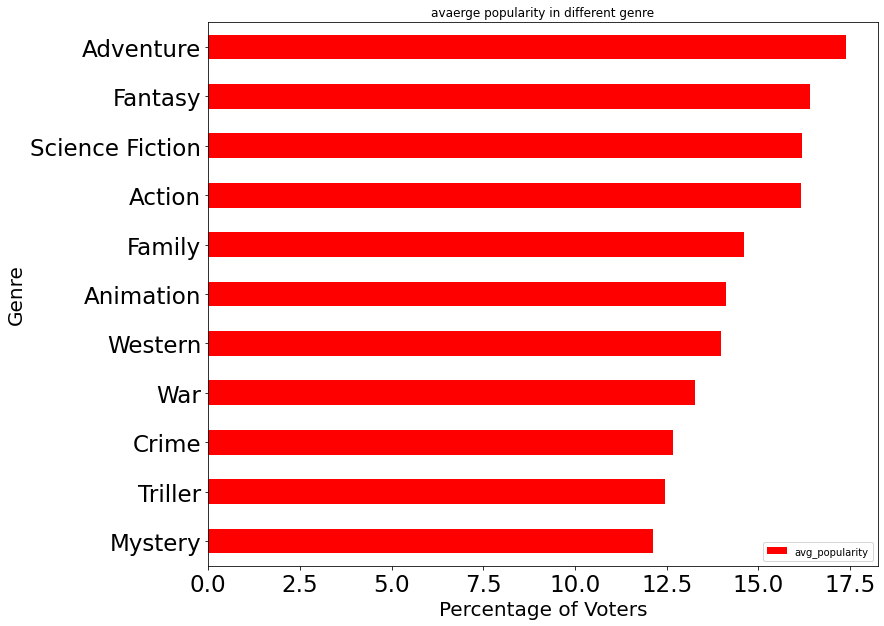

In [229]:
#make the genre_df to a bar chart
genre_df.plot(y = 'avg_popularity',kind = "barh", figsize = (12,10), title = "avaerge popularity in different genre", fontsize = 23, color = "r")
plt.xlabel('Percentage of Voters',fontsize = 20)
plt.ylabel('Genre', fontsize = 20)

### Adventure, Fantasy, Science Fiction, Action are the genre Microsoft should focus on

## Who are the directors Microsoft should want based upon our chosen genres and box office success?

### Let's look at the respective datatypes

In [195]:
#check the rt_movie_info_df and drop NaN row.
rt_movie_info_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [196]:
rt_movie_info_df.dropna(inplace = True)

In [197]:
rt_movie_info_df.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [198]:
#convert genre, director, writer to string. convert box_office to num.
rt_movie_info_df.loc[:, 'genre'] = rt_movie_info_df["genre"].astype('string')
rt_movie_info_df.loc[:, 'director'] = rt_movie_info_df["director"].astype('string')
rt_movie_info_df.loc[:, 'writer'] = rt_movie_info_df["writer"].astype('string')
rt_movie_info_df.loc[:, 'box_office'] = rt_movie_info_df["box_office"].str.replace(",", "").astype('int64')

In [199]:
rt_movie_info_df.dtypes

id               int64
synopsis        object
rating          object
genre           string
director        string
writer          string
theater_date    object
dvd_date        object
currency        object
box_office       int64
runtime         object
studio          object
dtype: object

In [200]:
#list genre, writer, director columns sorting by box_office
select_dict_df = rt_movie_info_df[['genre', 'director', 'box_office']].sort_values(by = 'box_office', ascending = False)

In [201]:
select_dict_df

,genre,director,box_office
827,Drama,Mel Gibson,368000000
877,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,303001229
1188,Action and Adventure|Mystery and Suspense,Sam Mendes,299300000
690,Comedy,Jay Roach,279167575
1117,Kids and Family|Science Fiction and Fantasy,Chris Columbus,261835892
...,...,...,...
1353,Drama|Mystery and Suspense,Will Canon,16632
1269,Art House and International|Drama,Jeanne Labrune,8856
691,Action and Adventure|Comedy|Drama,Richard Rush,8300
697,Drama|Horror|Mystery and Suspense,Eric England,3328


### Who are the most successful directors in the Action, Adventure, Science Fiction, and Fantasy genre?

In [204]:
#top 5 rows of writer and director had great success in Action
recommended_director_df = select_dict_df.loc[select_dict_df['genre'].map(lambda x : ("Action and Adventure|Science Fiction and Fantasy")  in x)]
recommended_director_df

,genre,director,box_office
877,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,303001229
657,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,234141872
1237,Action and Adventure|Science Fiction and Fantasy,Bryan Singer,214813155
338,Action and Adventure|Science Fiction and Fantasy,Tim Story,154485963
97,Action and Adventure|Science Fiction and Fantasy,Rob Bowman,42929971
1541,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,25335935
584,Action and Adventure|Science Fiction and Fantasy,Richard Donner,19375474


In [234]:
recommended_director_df = recommended_director_df[['director', 'box_office']]
recommended_director_df = recommended_director_df.sort_values(by = 'box_office', ascending = True)

## Let's look at the recommended directors and writers Microsoft should align with

Text(0, 0.5, 'Director')

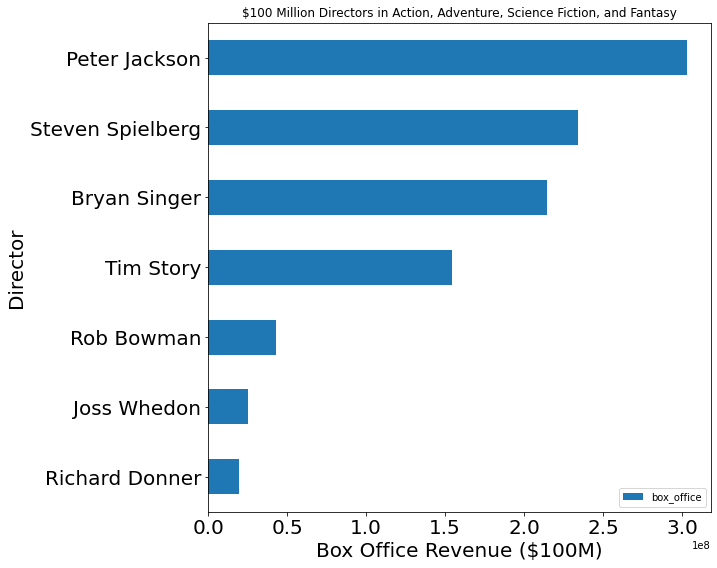

In [236]:
recommended_director_df.plot(x = 'director', kind = "barh", figsize = (9,9),
                             title = "$100 Million Directors in Action, Adventure, Science Fiction, and Fantasy",
                             fontsize = 20
                        )
plt.xlabel('Box Office Revenue ($100M)',fontsize = 20)
plt.ylabel('Director', fontsize = 20)